In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd

In [86]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

Checking to make sure the Data was transmitting properly

In [6]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [7]:
df.tail()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [10]:
df.shape

(212331, 15)

Cleaning Data - Dropping Columns we dont need

In [11]:
drop_cols = ['Total Tested','Mean Score','Number Scoring Below 65','Number Scoring 65 or Above','Percent Scoring 65 or Above','Number Scoring 80 or Above','Percent Scoring 80 or Above','Number Scoring CR','Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis=1)

In [12]:
df.head(200)

,School DBN,School Name,School Level,Regents Exam,Year,Percent Scoring Below 65
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,6.3
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,11.1
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,s
...,...,...,...,...,...,...
195,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2016,4.3
196,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra,2017,6.7
197,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra2,2016,6.8
198,01M539,"New Explorations into Science, Technology and ...",K-12 all grades,Common Core Algebra2,2017,5.1


Filtering the Schools to make it easier to read and dropping values.

In [76]:
filtered_School_df = df[
     (df['School Name'] == 'Mott Hall Bronx High School') &
     (df['Regents Exam'] == 'Common Core English') |
     (df['Year'].isin(['2015', '2016', '2017']))
]

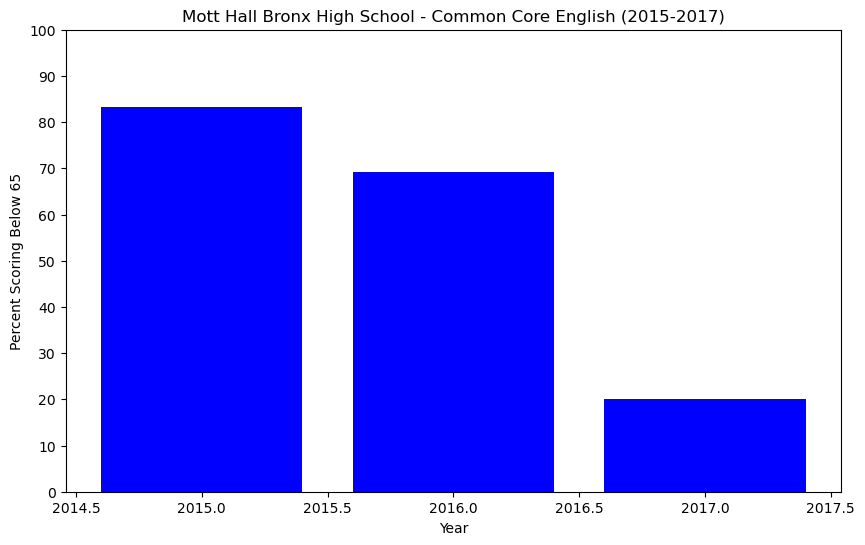

In [99]:
filtered_School_df['Percent Scoring Below 65'] = pd.to_numeric(filtered_School_df['Percent Scoring Below 65'], errors='coerce')


filtered_School_df = filtered_School_df.dropna(subset=['Percent Scoring Below 65'])


plt.figure(figsize=(10, 6))
plt.bar(filtered_School_df['Year'], filtered_School_df['Percent Scoring Below 65'], color='blue')
plt.xlabel('Year')
plt.ylabel('Percent Scoring Below 65')
plt.title('Mott Hall Bronx High School - Common Core English (2015-2017)')



plt.yticks(range(0, 101, 10))  
plt.show()

In [133]:
filtered_School_df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Percent Scoring Below 65
5468,09X252,Mott Hall Bronx High School,High school,Common Core English,2015,28.6
5469,09X252,Mott Hall Bronx High School,High school,Common Core English,2016,21.2
5470,09X252,Mott Hall Bronx High School,High school,Common Core English,2017,6.9
29352,09X252,Mott Hall Bronx High School,High school,Common Core English,2015,20.7
29353,09X252,Mott Hall Bronx High School,High school,Common Core English,2015,56.5
29354,09X252,Mott Hall Bronx High School,High school,Common Core English,2016,12.2
29355,09X252,Mott Hall Bronx High School,High school,Common Core English,2016,54.5
29356,09X252,Mott Hall Bronx High School,High school,Common Core English,2017,2.6
29357,09X252,Mott Hall Bronx High School,High school,Common Core English,2017,20.0
68007,09X252,Mott Hall Bronx High School,High school,Common Core English,2016,69.2


In [129]:
filtered_District_df = df[
    (df['School DBN'].str.contains('01M')) &
    ((df['Regents Exam'] == 'Common Core English') |
    (df['School Level'] == 'High School') |
    (df['Year'].isin(['2015', '2016', '2017'])))
]

df = df[~df['Percent Scoring Below 65'].isin(['0', 'S'])]


In [134]:
filtered_District_df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Percent Scoring Below 65
25,01M292,Orchard Collegiate Academy,High school,Common Core English,2015,44.1
26,01M292,Orchard Collegiate Academy,High school,Common Core English,2016,28.3
27,01M292,Orchard Collegiate Academy,High school,Common Core English,2017,7.3
67,01M448,University Neighborhood High School,High school,Common Core English,2015,28.6
68,01M448,University Neighborhood High School,High school,Common Core English,2016,14.4
69,01M448,University Neighborhood High School,High school,Common Core English,2017,18.0
98,01M450,East Side Community School,Secondary School,Common Core English,2016,6.0
99,01M450,East Side Community School,Secondary School,Common Core English,2017,7.3
111,01M458,Forsyth Satellite Academy,High school,Common Core English,2015,48.5
112,01M458,Forsyth Satellite Academy,High school,Common Core English,2016,38.6


In [107]:
!pip install seaborn
import seaborn as sns

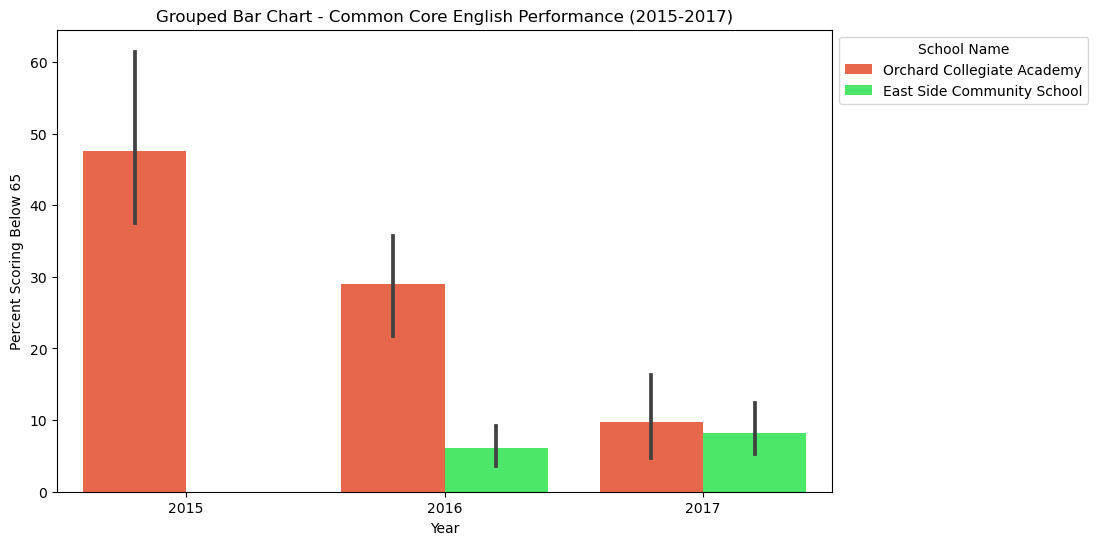

In [132]:
filtered_District_df['Percent Scoring Below 65'] = pd.to_numeric(filtered_District_df['Percent Scoring Below 65'])


selected_schools = ['Orchard Collegiate Academy', 'East Side Community School']
filtered_school_df = filtered_District_df[filtered_District_df['School Name'].isin(selected_schools)]


plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Percent Scoring Below 65', hue='School Name', data=filtered_school_df, palette=['#FF5733', '#33FF57'])
plt.xlabel('Year')
plt.ylabel('Percent Scoring Below 65')
plt.title('Grouped Bar Chart - Common Core English Performance (2015-2017)')
plt.legend(title='School Name', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In conclusion the Data Shows 'Mott Hall bronx HighSchool'made signifanct improvement in students scoring below 65 between 2015-2017. Schools like Orchard Collegiate Academy also made some improvements. East Side Community did slightly worse in 2017 compared to 2016